In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('Clustering').getOrCreate()

In [ ]:
spark

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
df = spark.read.csv('iris.csv',header=True,inferSchema=True)

In [ ]:
df.head(5)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, species='setosa'),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, species='setosa'),
 Row(sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, species='setosa'),
 Row(sepal_length=4.6, sepal_width=3.1, petal_length=1.5, petal_width=0.2, species='setosa'),
 Row(sepal_length=5.0, sepal_width=3.6, petal_length=1.4, petal_width=0.2, species='setosa')]

In [ ]:
df.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
|         5.4|        3.7|         1.5|        0.2| setosa|
|         4.8|        3.4|         1.6|        0.2| setosa|
|         4.8|        3.0|         1.4|        0.1| setosa|
|         4.3|        3.0|         1.1| 

In [ ]:
df.select("species").count()

150

In [ ]:
df.groupBy('species').count().show()

+----------+-----+
|   species|count|
+----------+-----+
| virginica|   50|
|versicolor|   50|
|    setosa|   50|
+----------+-----+



In [ ]:
df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [ ]:
df.groupBy('sepal_length').count().show()

+------------+-----+
|sepal_length|count|
+------------+-----+
|         5.4|    6|
|         7.0|    1|
|         6.1|    6|
|         7.7|    4|
|         6.6|    2|
|         4.5|    1|
|         5.7|    8|
|         6.7|    8|
|         7.4|    1|
|         6.5|    5|
|         4.9|    6|
|         6.2|    4|
|         5.1|    9|
|         7.3|    1|
|         4.3|    1|
|         7.9|    1|
|         4.7|    2|
|         5.3|    1|
|         7.2|    3|
|         7.6|    1|
+------------+-----+
only showing top 20 rows



In [ ]:
#Creating the FeatureSet
from pyspark.ml.feature import VectorAssembler

In [ ]:
#List the columns and create the numerical columns
df.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [ ]:
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
#Using VectorAssembler create the New feature set column
vector_assembler = VectorAssembler(inputCols=input_cols,outputCol="Features")

In [ ]:
#Apply the vector_seembler on the DataFrame
final_data = vector_assembler.transform(df)


In [ ]:
final_data.show()

+------------+-----------+------------+-----------+-------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|species|         Features|
+------------+-----------+------------+-----------+-------+-----------------+
|         5.1|        3.5|         1.4|        0.2| setosa|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2| setosa|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2| setosa|[4.7,3.2,1.3,0.2]|
|         4.6|        3.1|         1.5|        0.2| setosa|[4.6,3.1,1.5,0.2]|
|         5.0|        3.6|         1.4|        0.2| setosa|[5.0,3.6,1.4,0.2]|
|         5.4|        3.9|         1.7|        0.4| setosa|[5.4,3.9,1.7,0.4]|
|         4.6|        3.4|         1.4|        0.3| setosa|[4.6,3.4,1.4,0.3]|
|         5.0|        3.4|         1.5|        0.2| setosa|[5.0,3.4,1.5,0.2]|
|         4.4|        2.9|         1.4|        0.2| setosa|[4.4,2.9,1.4,0.2]|
|         4.9|        3.1|         1.5|        0.1| setosa|[4.9,

In [ ]:
#Now lets apply Kmeans clustering
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
kmeans = KMeans(featuresCol='Features',k=3)

In [ ]:
kmeans

KMeans_2b7067f707d7

In [ ]:
#Lets train the dataset using the fit() method.
model = kmeans.fit(final_data)

In [ ]:
#Now lets create the clusters
prediction = model.transform(final_data)

In [ ]:
'''
As it can be observed, the setosa species is perfectly grouped along with
versicolor, almost being captured in the same cluster, but verginica seems to fall
within two different groups. K-means can produce different results every time as
it chooses the starting point (centroid) randomly every time. Hence, the results
that you might get in you K-means clustering might be totally different from
these results unless we use a seed to reproduce the results. The seed ensures the
split and the initial centroid values remain consistent throughout the analysis.
'''
prediction.groupBy('species','prediction').count().show()

+----------+----------+-----+
|   species|prediction|count|
+----------+----------+-----+
|    setosa|         2|   50|
| virginica|         0|   14|
| virginica|         1|   36|
|versicolor|         1|    3|
|versicolor|         0|   47|
+----------+----------+-----+



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# visualization of clusters
pandas_df = prediction.toPandas()
pandas_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Features,prediction
0,5.1,3.5,1.4,0.2,setosa,"[5.1, 3.5, 1.4, 0.2]",1
1,4.9,3.0,1.4,0.2,setosa,"[4.9, 3.0, 1.4, 0.2]",1
2,4.7,3.2,1.3,0.2,setosa,"[4.7, 3.2, 1.3, 0.2]",1
3,4.6,3.1,1.5,0.2,setosa,"[4.6, 3.1, 1.5, 0.2]",1
4,5.0,3.6,1.4,0.2,setosa,"[5.0, 3.6, 1.4, 0.2]",1


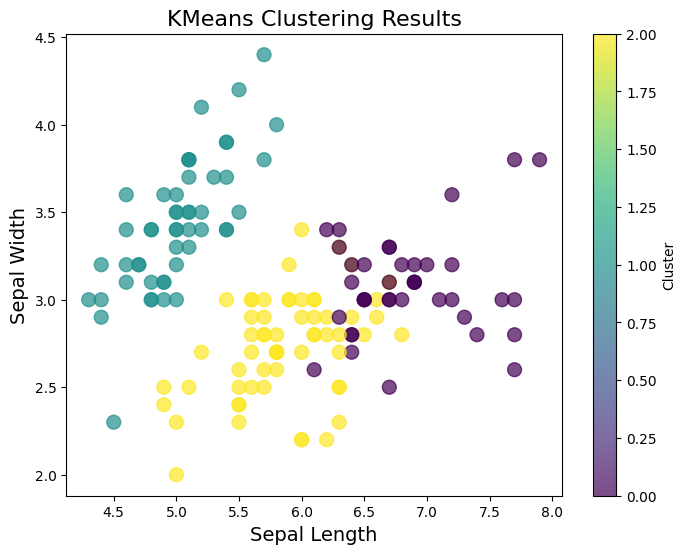

In [ ]:
import matplotlib.pyplot as plt

# Extract data for visualization
x = pandas_df['sepal_length']
y = pandas_df['sepal_width']
clusters = pandas_df['prediction']  # Cluster assignments

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=clusters, cmap='viridis', s=100, alpha=0.7)

# Add labels and title
plt.title('KMeans Clustering Results', fontsize=16)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)

# Add a colorbar to show cluster indices
plt.colorbar(label='Cluster')

# Show the plot
plt.show()


In [ ]:
evaluator = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='Features',
                                metricName='silhouette',
                                distanceMeasure='squaredEuclidean')

sls = []

for k in range(2,10):
  km = KMeans(featuresCol='Features',k=k)
  model = km.fit(final_data)
  predictions=model.transform(final_data)
  score = evaluator.evaluate(predictions)
  sls.append(score)




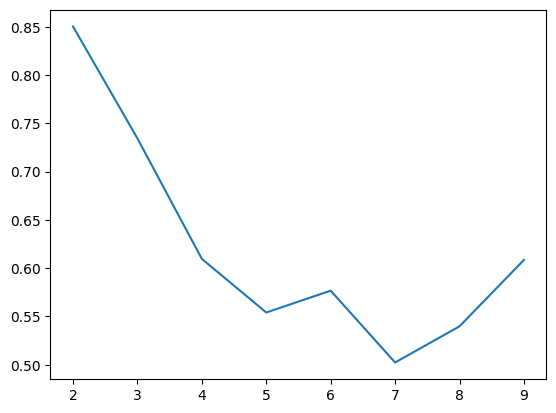

In [ ]:
plt.plot(range(2,10),sls)

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import numpy as np
import pickle

In [ ]:
with open('model_pickle','wb') as fp:
    pickle.dump(model.get_params(), fp)

AttributeError: 'KMeansModel' object has no attribute 'get_params'

In [ ]:
from joblib import dump
dump(model, 'model.joblib')


TypeError: cannot pickle '_thread.RLock' object